In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import jaccard_similarity_score  
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

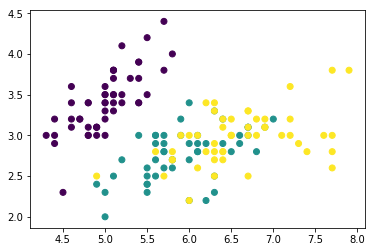

In [2]:
#Task 1
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Original data


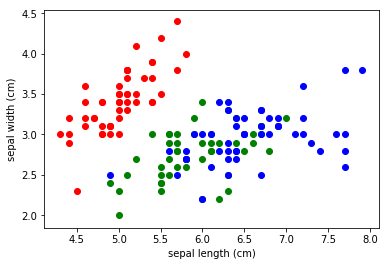

K-means k = 3


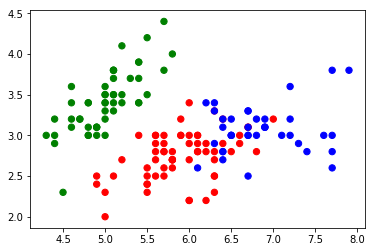

K-means k = 3, k-means++


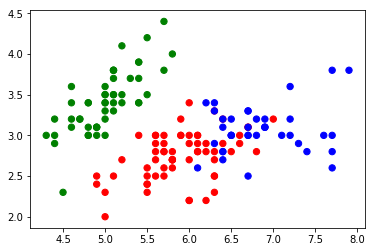

K-means k = 2


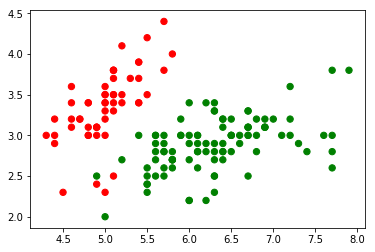

In [3]:
#Task 2
print("Original data")
iris = load_iris()
plt.scatter(iris.data[iris['target']==0, 0], iris.data[iris['target']==0, 1], color='r')
plt.scatter(iris.data[iris['target']==1, 0], iris.data[iris['target']==1, 1], color='g')
plt.scatter(iris.data[iris['target']==2, 0], iris.data[iris['target']==2, 1], color='b')
plt.xlabel(iris['feature_names'][0])
plt.ylabel(iris['feature_names'][1])
plt.show()

iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
colormap = np.array(['red', 'green', 'blue'])

print("K-means k = 3")
model = KMeans(n_clusters=3)
model.fit(x)

plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[model.labels_], s=40)
plt.show()

print("K-means k = 3, k-means++")
model = KMeans(n_clusters=3, init='k-means++')
model.fit(x)

plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[model.labels_], s=40)
plt.show()

print("K-means k = 2")
model2 = KMeans(n_clusters=2, init='k-means++')
model2.fit(x)

plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[model2.labels_], s=40)
plt.show()


Clusters = 1 score = 0.333333333333


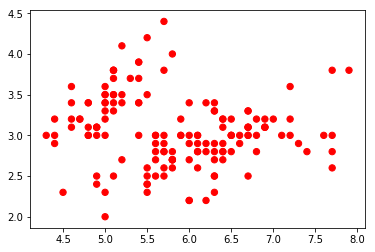

Clusters = 2 score = 0.02


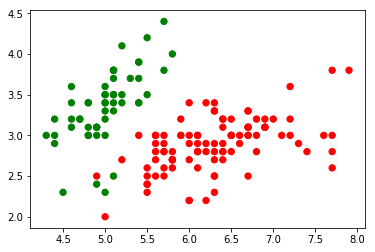

Clusters = 3 score = 0.893333333333


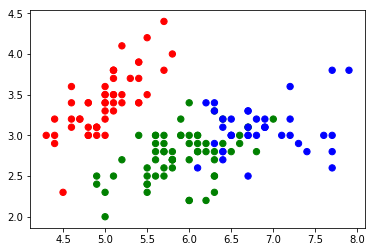

Clusters = 4 score = 0.00666666666667


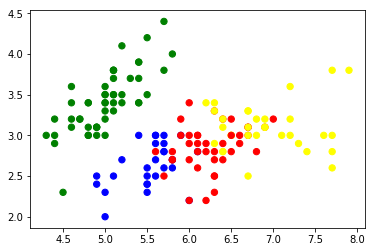

Clusters = 5 score = 0.42


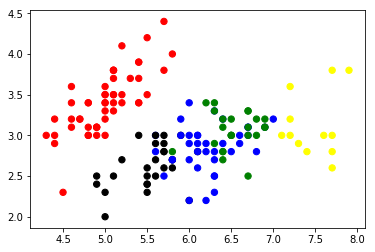

Clusters = 6 score = 0.08


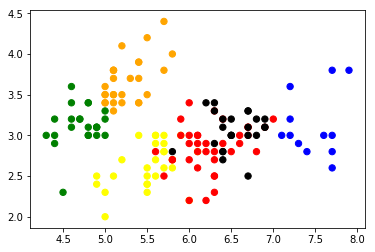

In [4]:
#Task 4
x = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target) #true y
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
colormap = np.array(['red', 'green', 'blue','yellow','black','orange'])
scores = []
dist = []
for i in range(6):
    model = KMeans(n_clusters=(i+1))
    model.fit(x)
    score = jaccard_similarity_score(y, model.labels_) #warning, random order of targets!
    scores.append(score)
    interia = model.inertia_
    dist.append(interia)
    print("Clusters = " + str(i+1) + " score = " + str(score))
    plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[model.labels_], s=40)
    plt.show()

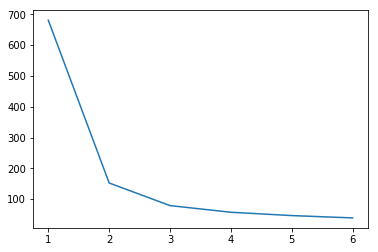

In [5]:
#Task 3
k = [1, 2, 3, 4, 5, 6]
plt.plot(k, dist)
plt.show()

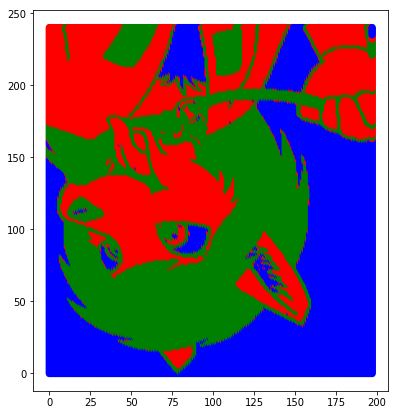

In [6]:
#Task 5
img = Image.open('test2.jpg')  
width, height = img.size  
arr = img.load()

data = []
for w in range(width):
    for h in range(height):
        rp,gp,bp = arr[w, h]
        data.append((rp,gp,bp,w,h))
        
x = pd.DataFrame(data)
model = KMeans(n_clusters=3)
model.fit(x)

x.columns = ['r','g','b','w','h']

# K Means Cluster
model = KMeans(n_clusters=3)
model.fit(x)

# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'green', 'blue'])
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.w, x.h, c=colormap[model.labels_], s=40)
plt.show()

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.

dict_keys(['target', 'data', 'images', 'DESCR'])
(400, 64, 64)
(400, 4096)
(400,)
1.0
0.0
0.547043


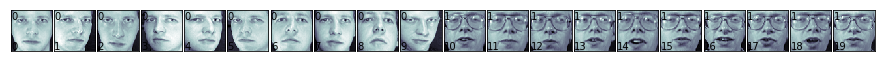

In [7]:
#Task 5(2)
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

print(faces.DESCR)
print(faces.keys())
print(faces.images.shape)
print(faces.data.shape)
print(faces.target.shape)
print(np.max(faces.data))
print(np.min(faces.data))
print(np.mean(faces.data))

import matplotlib.pyplot as plt
def print_faces(images, target, top_n):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)

        # label the image with the target value
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))
    plt.show()

print_faces(faces.images, faces.target, 20)

Clusters = 1 score = 0.5


/usr/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


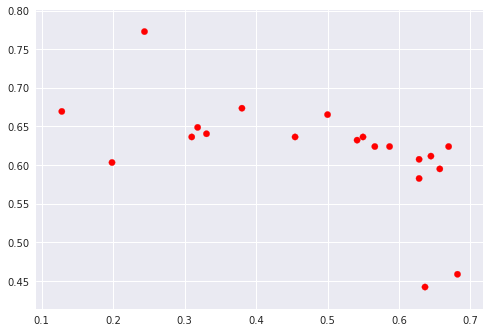

Clusters = 2 score = 0.95


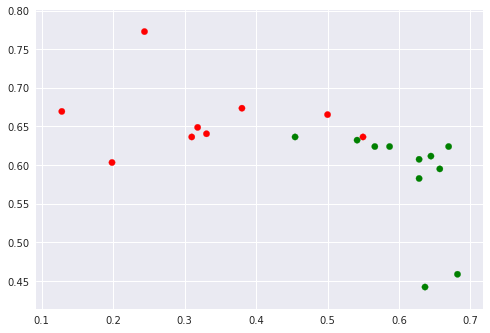

Clusters = 3 score = 0.15


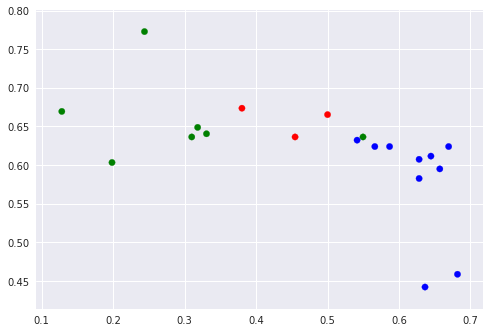

Clusters = 4 score = 0.75


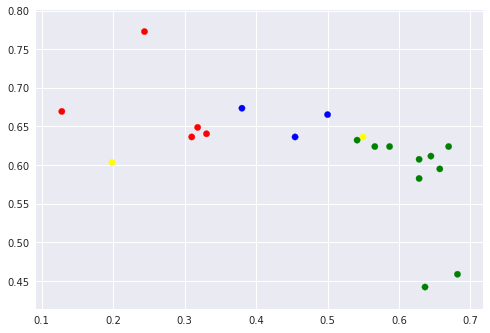

Clusters = 5 score = 0.55


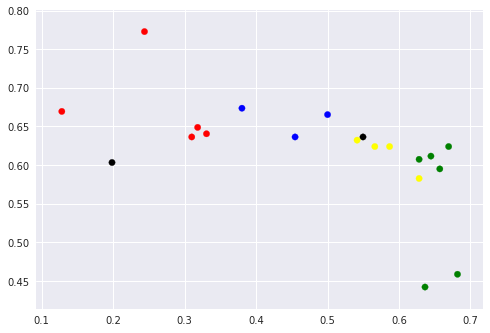

Clusters = 6 score = 0.4


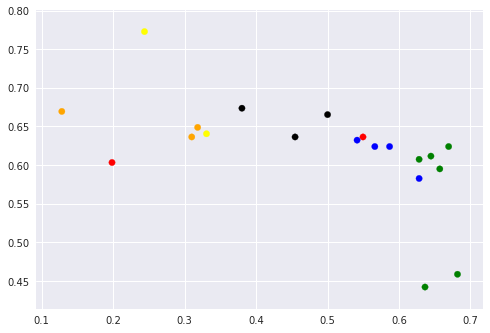

In [15]:
#Task 6
x = pd.DataFrame(faces.data)[:20] #4096 columns
y = pd.DataFrame(faces.target)[:20] #true y

colormap = np.array(['red', 'green', 'blue','yellow','black','orange'])
scores = []
dist = []
for i in range(6):
    model = KMeans(n_clusters=(i+1))
    model.fit(x)
    score = jaccard_similarity_score(y, model.labels_) #warning, random order of targets!
    scores.append(score)
    interia = model.inertia_
    dist.append(interia)
    print("Clusters = " + str(i+1) + " score = " + str(score))
    plt.scatter(x[0], x[4000], c=colormap[model.labels_], s=40)
    plt.show()

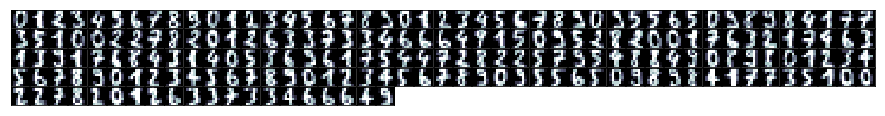

In [9]:
#Task 7
from sklearn.datasets import load_digits
digits = load_digits()

def print_digits(images, target, top_n):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(45, 45, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
    plt.show()
    
    
print_digits(digits.images, digits.target, 200)

Clusters = 1 score = 0.0990539788536
Clusters = 2 score = 0.00556483027268
Clusters = 3 score = 0.0217028380634
Clusters = 4 score = 0.0968280467446
Clusters = 5 score = 0.0946021146355
Clusters = 6 score = 0.216471897607


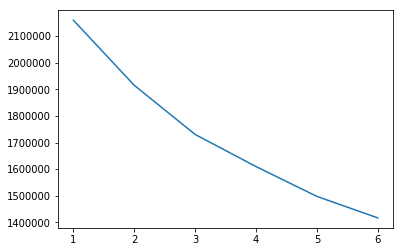

In [10]:
#Task 8
x = pd.DataFrame(digits.data)
y = pd.DataFrame(digits.target) #true y

dist = []
scores = []
for i in range(6):
    model = KMeans(n_clusters=(i+1))
    model.fit(x)
    interia = model.inertia_
    dist.append(interia)
    score = jaccard_similarity_score(y, model.labels_) #warning, random order of targets!
    scores.append(score)
    print("Clusters = " + str(i+1) + " score = " + str(score))
k = [1, 2, 3, 4, 5, 6]
plt.plot(k, dist)
plt.show()

/usr/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


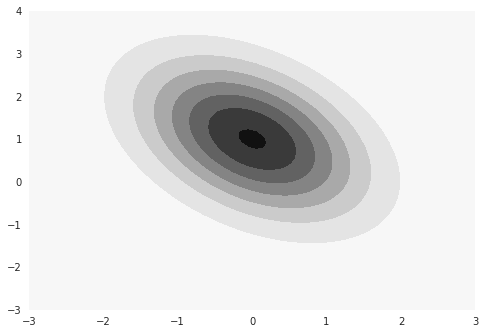

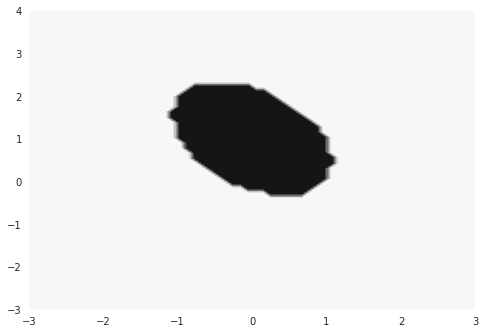

In [22]:
#Narysuj jedną poziomicę rozkładu normalnego 2d. Policz pole ograniczone tą poziomicą za pomocą całkowania 
#numerycznego.

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca()
cset = ax.contourf(X, Y, Z)
plt.show()
fig = plt.figure()
ax = fig.gca()
cset = ax.contourf(X, Y, Z>=0.08)
plt.show()